<a href="https://colab.research.google.com/github/raulacevedor/Pythonnubecucsh/blob/main/Unidad_3/Proyecto_4_Prediccion_de_salarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto 4. Predicción de salarios**
Fecha: 23 de octubre de 2025

##**Curso: Análisis y visualización de datos con Python en la nube**
#Nombre: Raúl Acevedo Rosas

*Campus: CUCSH*

In [23]:
# Conectar a mi unidad drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Crear dataframe
import pandas as pd
ruta_archivo = '/content/drive/MyDrive/Colab Data/data_af.csv'
df =pd.read_csv(ruta_archivo)
df

,rating,salary,draft_round,age,experience,bmi
0,97,37440000,1,36,17,26.72
1,97,32740000,1,29,9,25.27
2,96,25840000,1,26,7,24.66
3,96,37200000,1,32,13,24.11
4,96,38200000,1,31,11,25.98
...,...,...,...,...,...,...
434,95,40920000,1,33,14,24.11
435,95,35360000,1,28,9,23.28
436,94,10170000,1,22,3,25.49
437,94,39340000,1,31,9,25.04


,rating,salary,draft_round,age,experience,bmi
rating,1.000000,0.810253,0.008064,0.292463,0.416545,0.077374
salary,0.810253,1.000000,0.003895,0.442704,0.532051,0.037066
draft_round,0.008064,0.003895,1.000000,-0.081857,-0.055498,0.047773
age,0.292463,0.442704,-0.081857,1.000000,0.920067,0.086674
experience,0.416545,0.532051,-0.055498,0.920067,1.000000,0.071140
bmi,0.077374,0.037066,0.047773,0.086674,0.071140,1.000000


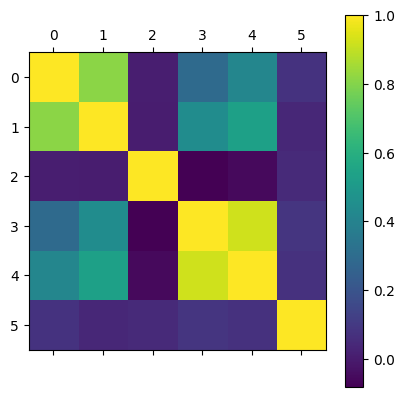

In [25]:
display(df.corr())
from matplotlib import pyplot as plt
plt.matshow(df.corr())
plt.colorbar()
plt.show()

<Axes: xlabel='draft_round', ylabel='salary'>

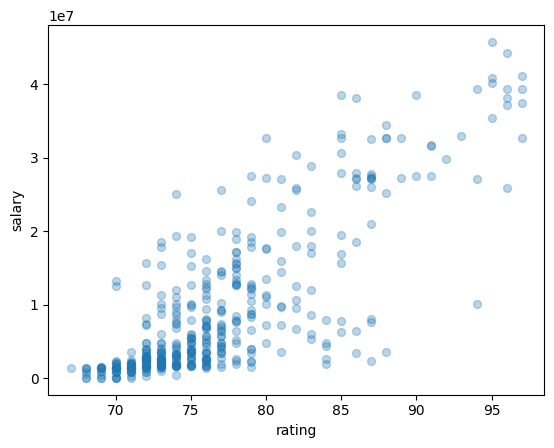

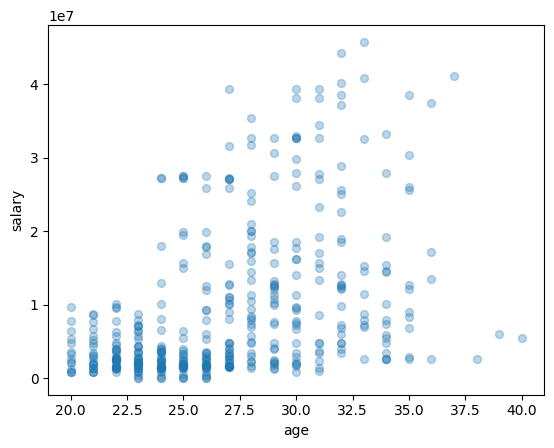

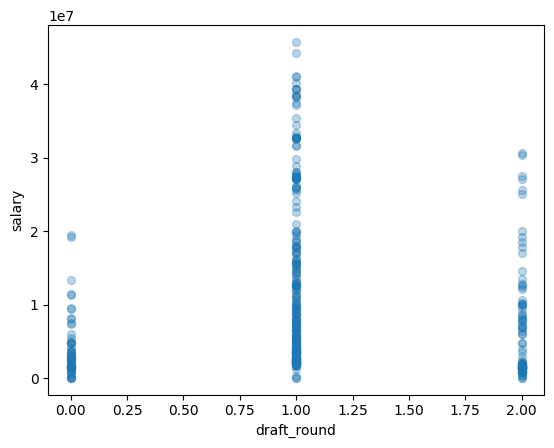

In [26]:
# Mostrar gráficas de puntos de "salary" respecto a "rating", "age", "draft_round"
df.plot(kind='scatter', x='rating', y='salary', s=32, alpha=0.3)
df.plot(kind='scatter', x='age', y='salary', s=32, alpha=0.3)
df.plot(kind='scatter', x='draft_round', y='salary', s=32, alpha=0.3)

In [144]:
X = df[['rating']]
y = df['salary']

display(X)
display(y)

,rating
0,97
1,97
2,96
3,96
4,96
...,...
434,95
435,95
436,94
437,94


,salary
0,37440000
1,32740000
2,25840000
3,37200000
4,38200000
...,...
434,40920000
435,35360000
436,10170000
437,39340000


# Regresión lineal simple

-96415084.91636325
[1376504.16178038]
R2_score: 0.5231979710467237
MAPE: 1.2472949178588626


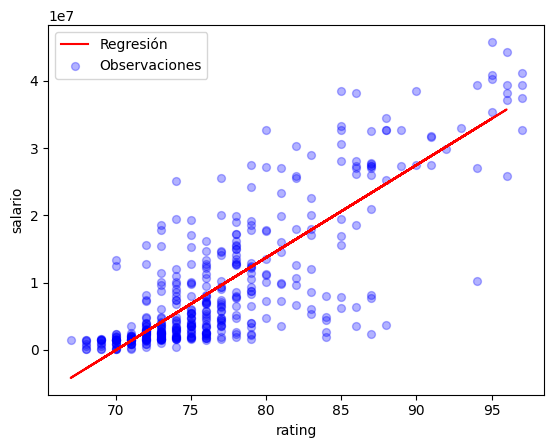

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split

# Combinar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecir salida
y_test_pred = modelo.predict(X_test)

# Calcular metricas
result_r2 = r2_score(y_test, y_test_pred)
result_mape = mape(y_test, y_test_pred)

# Mostrar resultados
print(modelo.intercept_)
print(modelo.coef_)
print("R2_score:", result_r2)
print("MAPE:", result_mape)

# Graficar resultados
plt.plot(X_test, y_test_pred, color='red',label="Regresión")
plt.scatter(X['rating'], y, color='blue', label='Observaciones', s=32, alpha=.3)
plt.legend()
plt.xlabel("rating")
plt.ylabel("salario")
plt.show()

# Regresión múltiple

       Feature       VIF
0       rating  7.218006
1  draft_round  4.042385
2   experience  3.623380


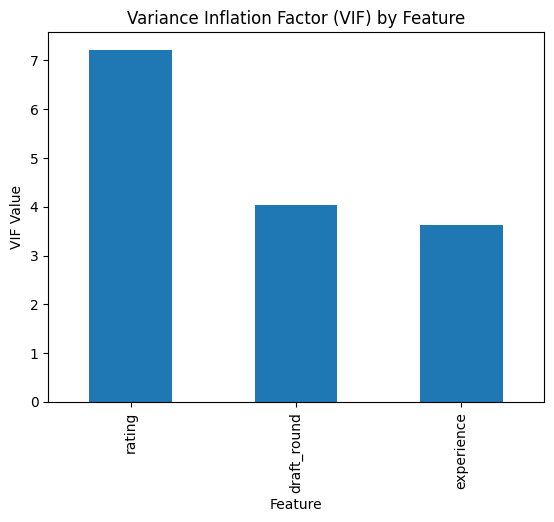

In [152]:
# Selección de variables por medio de VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular VIF
features = ["rating", "draft_round","experience"]
Xm = df[features]
vif_data = pd.DataFrame()
vif_data['Feature'] = features
vif_data['VIF'] = [variance_inflation_factor(Xm, i) for i in range(Xm.shape[1])]
print(vif_data)

# Gráfico de barras para los valores VIF
vif_data.plot(kind='bar', x='Feature', y='VIF', legend=False)
plt.title('Variance Inflation Factor (VIF) by Feature')
plt.ylabel('VIF Value')
plt.show()

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge

# Preparación del dataframe
df_2 = df.copy()
df_2['rating2'] = pow(df_2['rating'], 2)
df_2 = df_2[['rating','rating2','experience','draft_round']]
print(df_2)

x = np.asanyarray(df_2)
y = np.asanyarray(df[["salary"]])

# Combinar datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Regresión Ridge
ridge_regression = Pipeline([
    ('poly', PolynomialFeatures(degree=5)),# Grado del polinomio
    ('scaler', StandardScaler()),  # Normalización
    ('reg', Ridge(0.3))  # Parámetro de regularización
])

# Entrenar modelo
ridge_regression.fit(x_train, y_train)

# Calcular metricas R2 score
r2_score_train = ridge_regression.score(x_train, y_train)
r2_score_test = ridge_regression.score(x_test, y_test)

# Mostrar resultados
print("Regresión Ridge con carácteristicas polinómicas")
print("R2 score")
print("Fase de entrenamiento:", r2_score_train)
print("Fase de prueba:", r2_score_test)
print("MAPE:", result_mape)


     rating  rating2  experience  draft_round
0        97     9409          17            1
1        97     9409           9            1
2        96     9216           7            1
3        96     9216          13            1
4        96     9216          11            1
..      ...      ...         ...          ...
434      95     9025          14            1
435      95     9025           9            1
436      94     8836           3            1
437      94     8836           9            1
438      91     8281           7            1

[439 rows x 4 columns]
Regresión Ridge con carácteristicas polinómicas
R2 score
Fase de entrenamiento: 0.7916073652702729
Fase de prueba: 0.8206441369737625
MAPE: 1.2472949178588626
